In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Part 0: Extract data fro five states
path = r'C:\Users\ellen\Desktop\Data Analysis with Python\Project 3 - data\data\\'

columns=["POOL_ID", "LOAN_ID", "ACT_PERIOD", "CHANNEL", "SELLER", "SERVICER",
                        "MASTER_SERVICER", "ORIG_RATE", "CURR_RATE", "ORIG_UPB", "ISSUANCE_UPB",
                        "CURRENT_UPB", "ORIG_TERM", "ORIG_DATE", "FIRST_PAY", "LOAN_AGE",
                        "REM_MONTHS", "ADJ_REM_MONTHS", "MATR_DT", "OLTV", "OCLTV",
                        "NUM_BO", "DTI", "CSCORE_B", "CSCORE_C", "FIRST_FLAG", "PURPOSE",
                        "PROP", "NO_UNITS", "OCC_STAT", "STATE", "MSA", "ZIP", "MI_PCT",
                        "PRODUCT", "PPMT_FLG", "IO", "FIRST_PAY_IO", "MNTHS_TO_AMTZ_IO",
                        "DLQ_STATUS", "PMT_HISTORY", "MOD_FLAG", "MI_CANCEL_FLAG", "Zero_Bal_Code",
                        "ZB_DTE", "LAST_UPB", "RPRCH_DTE", "CURR_SCHD_PRNCPL", "TOT_SCHD_PRNCPL",
                        "UNSCHD_PRNCPL_CURR", "LAST_PAID_INSTALLMENT_DATE", "FORECLOSURE_DATE",
                        "DISPOSITION_DATE", "FORECLOSURE_COSTS", "PROPERTY_PRESERVATION_AND_REPAIR_COSTS",
                        "ASSET_RECOVERY_COSTS", "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS",
                        "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY", "NET_SALES_PROCEEDS",
                        "CREDIT_ENHANCEMENT_PROCEEDS", "REPURCHASES_MAKE_WHOLE_PROCEEDS",
                        "OTHER_FORECLOSURE_PROCEEDS", "NON_INTEREST_BEARING_UPB", "PRINCIPAL_FORGIVENESS_AMOUNT",
                        "ORIGINAL_LIST_START_DATE", "ORIGINAL_LIST_PRICE", "CURRENT_LIST_START_DATE",
                        "CURRENT_LIST_PRICE", "ISSUE_SCOREB", "ISSUE_SCOREC", "CURR_SCOREB",
                        "CURR_SCOREC", "MI_TYPE", "SERV_IND", "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT",
                        "CUMULATIVE_MODIFICATION_LOSS_AMOUNT", "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS",
                        "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS", "HOMEREADY_PROGRAM_INDICATOR",
                        "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT", "RELOCATION_MORTGAGE_INDICATOR",
                        "ZERO_BALANCE_CODE_CHANGE_DATE", "LOAN_HOLDBACK_INDICATOR", "LOAN_HOLDBACK_EFFECTIVE_DATE",
                        "DELINQUENT_ACCRUED_INTEREST", "PROPERTY_INSPECTION_WAIVER_INDICATOR",
                        "HIGH_BALANCE_LOAN_INDICATOR", "ARM_5_YR_INDICATOR", "ARM_PRODUCT_TYPE",
                        "MONTHS_UNTIL_FIRST_PAYMENT_RESET", "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET",
                        "INTEREST_RATE_CHANGE_DATE", "PAYMENT_CHANGE_DATE", "ARM_INDEX",
                        "ARM_CAP_STRUCTURE", "INITIAL_INTEREST_RATE_CAP", "PERIODIC_INTEREST_RATE_CAP",
                        "LIFETIME_INTEREST_RATE_CAP", "MARGIN", "BALLOON_INDICATOR",
                        "PLAN_NUMBER", "FORBEARANCE_INDICATOR", "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR",
                        "DEAL_NAME", "RE_PROCS_FLAG", "ADR_TYPE", "ADR_COUNT", "ADR_UPB"]

# Because the original data in csv file is too large, we need to read in by chunk
chunk_size = 10000

def getfile(year_quarter, state_name):
    mylist = []
    for chunk in pd.read_csv(path + '20' + str(year_quarter) + '.csv', sep = '|', names = columns, header = None,
                            low_memory = False, error_bad_lines = False, chunksize = chunk_size):
        chunk = chunk[chunk['STATE'] == state_name]
        mylist.append(chunk)
    file = pd.concat(mylist, axis = 0)
    
    # Export the output file to csv so that we do not need to repeat the same exercise when we need to use the same data next time
    file.to_csv(path + 'file_20' + str(year_quarter) + '_' + str(state_name) + '.csv', index = False)
    return file

file_2008q1_MI = getfile("08Q1", "MI")
file_2018q1_MI = getfile("18Q1", "MI")

file_2008q1_CO = getfile("08Q1", "CO")
file_2018q1_CO = getfile("18Q1", "CO")

file_2008q1_GA = getfile("08Q1", "GA")
file_2018q1_GA = getfile("18Q1", "GA")

file_2008q1_OH = getfile("08Q1", "OH")
file_2018q1_OH = getfile("18Q1", "OH")

file_2008q1_VA = getfile("08Q1", 'VA') 
file_2018q1_VA = getfile("18Q1", 'VA') 

In [5]:
# part 1: read in data
file_2008q1_MI = pd.read_csv(path + 'file_2008Q1_MI.csv')
file_2018q1_MI = pd.read_csv(path + 'file_2018Q1_MI.csv')
file_2008q1_OH = pd.read_csv(path + 'file_2008Q1_OH.csv')
file_2008q1_VA = pd.read_csv(path + 'file_2008Q1_VA.csv')
file_2008q1_GA = pd.read_csv(path + 'file_2008Q1_GA.csv')
file_2018q1_OH = pd.read_csv(path + 'file_2018Q1_OH.csv')
file_2018q1_VA = pd.read_csv(path + 'file_2018Q1_VA.csv')
file_2018q1_GA = pd.read_csv(path + 'file_2018Q1_GA.csv')
file_2008q1 = pd.concat([file_2008q1_OH, file_2008q1_VA, file_2008q1_GA, file_2008q1_MI])
file_2018q1 = pd.concat([file_2018q1_OH, file_2018q1_VA, file_2018q1_GA, file_2018q1_MI])

In [6]:
file_2018q1.head()

,POOL_ID,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,MASTER_SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,...,MARGIN,BALLOON_INDICATOR,PLAN_NUMBER,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,DEAL_NAME,RE_PROCS_FLAG,ADR_TYPE,ADR_COUNT,ADR_UPB
0,NaN,100001040173,22018,R,"Quicken Loans, Llc",Quicken Loans Inc.,NaN,4.25,4.25,453000.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
1,NaN,100001040173,32018,R,"Quicken Loans, Llc",Quicken Loans Inc.,NaN,4.25,4.25,453000.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
2,NaN,100001040173,42018,R,"Quicken Loans, Llc",Quicken Loans Inc.,NaN,4.25,4.25,453000.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
3,NaN,100001040173,52018,R,"Quicken Loans, Llc",Quicken Loans Inc.,NaN,4.25,4.25,453000.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
4,NaN,100001040173,62018,R,"Quicken Loans, Llc",Quicken Loans Inc.,NaN,4.25,4.25,453000.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN


In [7]:
# The above data contains all monthly payment information with multiple rows of data
# But we don't need monthly payment data for our analysis
nodup_2008q1 = file_2008q1.drop_duplicates(subset = ['POOL_ID', 'LOAN_ID'], keep = 'first')
nodup_2018q1 = file_2018q1.drop_duplicates(subset = ['POOL_ID', 'LOAN_ID'], keep = 'first')

In [8]:
nodup_2008q1.groupby('STATE')['LOAN_ID'].count()

STATE
GA    11480
MI    11530
OH    11450
VA    11877
Name: LOAN_ID, dtype: int64

In [9]:
nodup_2018q1.groupby('STATE')['LOAN_ID'].count()

STATE
GA    13989
MI    14316
OH    11815
VA    11092
Name: LOAN_ID, dtype: int64

In [10]:
# part 2: Analysis
'''
    A loan with FICO < 580 is considered as a subprime loan. The applicant has some bad credit records such as a lot of delinquencies, history of bankrupty, etc..
    Before Q3 2008, a lot of subprime mortgage loans were isssued. They bombed in Q3 2008.
    After Q3 2008, US government tightened some rules for underwriting (approval of loan applications)
    We want to compare the difference in some key metrics between Q1 2008 and Q1 2018
'''

'\n    A loan with FICO < 580 is considered as a subprime loan. The applicant has some bad credit records such as a lot of delinquencies, history of bankrupty, etc..\n    Before Q3 2008, a lot of subprime mortgage loans were isssued. They bombed in Q3 2008.\n    After Q3 2008, US government tightened some rules for underwriting (approval of loan applications)\n    We want to compare the difference in some key metrics between Q1 2008 and Q1 2018\n'

In [11]:
# Analysis 1: Loan Quality - FICO
# In this analysis, we will use FICO score as an indicator for loan quality.
nodup_2008q1[['CSCORE_B', 'CSCORE_C']].dropna().mean()

CSCORE_B    742.583858
CSCORE_C    744.307487
dtype: float64

In [12]:
nodup_2018q1[['CSCORE_B', 'CSCORE_C']].dropna().mean()

CSCORE_B    753.791382
CSCORE_C    755.861868
dtype: float64

In [16]:
# On average, loans in 2018 has higher fico scores

# According to the rules, if a couple are applying for a loan, they will usually use the lower FICO of the two
# If it's only one applicant, CSCORE_C will remain NAN
nodup_2008q1['min_fico'] = nodup_2008q1[['CSCORE_B', 'CSCORE_C']].min(axis = 1)
print(nodup_2008q1[['CSCORE_B', 'CSCORE_C', 'min_fico']].head()) # if we don't use print() function here, only the line below will be printed
print('Average FICO in Q1 2008: {}'.format(nodup_2008q1['min_fico'].mean()))

     CSCORE_B  CSCORE_C  min_fico
0       673.0       NaN     673.0
41      710.0       NaN     710.0
97      626.0     596.0     596.0
144     635.0       NaN     635.0
163     777.0     813.0     777.0
Average FICO in Q1 2008: 728.7063130385952


<ipython-input-16-3a552a49e37f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodup_2008q1['min_fico'] = nodup_2008q1[['CSCORE_B', 'CSCORE_C']].min(axis = 1)


In [17]:
nodup_2018q1['min_fico'] = nodup_2018q1[['CSCORE_B', 'CSCORE_C']].min(axis = 1)
print(nodup_2018q1[['CSCORE_B', 'CSCORE_C', 'min_fico']].head())
print('Average FICO in Q1 2018: {}'.format(nodup_2018q1['min_fico'].mean()))

     CSCORE_B  CSCORE_C  min_fico
0       791.0       NaN     791.0
29      781.0       NaN     781.0
66      743.0       NaN     743.0
118     775.0     744.0     744.0
147     703.0       NaN     703.0
Average FICO in Q1 2018: 742.7649702939337


<ipython-input-17-0e00b415fd64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodup_2018q1['min_fico'] = nodup_2018q1[['CSCORE_B', 'CSCORE_C']].min(axis = 1)


In [18]:
# We want to assign fico scores to the following band/tier/bin
def fico_tier(x):
    if x < 580: 
        return '580 & below'
    elif x <= 620: 
        return '581-620'
    elif x <= 660:
        return '621-660'
    elif x <= 700:
        return '661-700'
    elif x <= 740:
        return '701-740'
    elif x <=780:
        return '741-780'
    elif x <=800:
        return '781-820'
    else:
        return '820+'
    
nodup_2008q1['fico_band'] = nodup_2008q1['min_fico'].apply(fico_tier)
nodup_2018q1['fico_band'] = nodup_2018q1['min_fico'].apply(fico_tier)

<ipython-input-18-a943ae1efac0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodup_2008q1['fico_band'] = nodup_2008q1['min_fico'].apply(fico_tier)
<ipython-input-18-a943ae1efac0>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodup_2018q1['fico_band'] = nodup_2018q1['min_fico'].apply(fico_tier)


In [20]:
# summarize the loans to their fico band/tier/bin
summary_2008q1 = nodup_2008q1.groupby('fico_band')['LOAN_ID'].count().reset_index().rename(columns = {'LOAN_ID': 'loan count'})
print(summary_2008q1.head(10))

     fico_band  loan count
0  580 & below         289
1      581-620        1671
2      621-660        4437
3      661-700        7942
4      701-740        9534
5      741-780       12233
6      781-820        6927
7         820+        3304


In [21]:
summary_2008q1['loan count pct'] = summary_2008q1['loan count'] / len(nodup_2008q1['LOAN_ID'])
print(summary_2008q1.head(10))

     fico_band  loan count  loan count pct
0  580 & below         289        0.006237
1      581-620        1671        0.036062
2      621-660        4437        0.095755
3      661-700        7942        0.171397
4      701-740        9534        0.205754
5      741-780       12233        0.264001
6      781-820        6927        0.149492
7         820+        3304        0.071304


In [22]:
summary_2018q1 = nodup_2018q1.groupby('fico_band')['LOAN_ID'].count().reset_index().rename(columns = {'LOAN_ID': 'loan count'})
print(summary_2018q1)

  fico_band  loan count
0   581-620          56
1   621-660        3224
2   661-700        7332
3   701-740       11754
4   741-780       15036
5   781-820        8752
6      820+        5058


In [25]:
summary_2018q1['loan count pct'] = summary_2018q1['loan count'] / len(nodup_2018q1['LOAN_ID'])
print(summary_2018q1.head(10))

  fico_band  loan count  loan count pct
0   581-620          56        0.001093
1   621-660        3224        0.062954
2   661-700        7332        0.143170
3   701-740       11754        0.229517
4   741-780       15036        0.293603
5   781-820        8752        0.170897
6      820+        5058        0.098766


In [26]:
# merge the two summary files
summary_two = pd.merge(summary_2008q1.rename(columns = {'loan count': 'loan count 2008Q1', 'loan count pct': 'loan count pct 2008Q1'}),
                      summary_2018q1.rename(columns = {'loan count': 'loan count 2018Q1', 'loan count pct': 'loan count pct 2018Q1'}),
                      on = 'fico_band', how = 'outer')
summary_two.head(10)

,fico_band,loan count 2008Q1,loan count pct 2008Q1,loan count 2018Q1,loan count pct 2018Q1
0,580 & below,289,0.006237,NaN,NaN
1,581-620,1671,0.036062,56.0,0.001093
2,621-660,4437,0.095755,3224.0,0.062954
3,661-700,7942,0.171397,7332.0,0.143170
4,701-740,9534,0.205754,11754.0,0.229517
5,741-780,12233,0.264001,15036.0,0.293603
6,781-820,6927,0.149492,8752.0,0.170897
7,820+,3304,0.071304,5058.0,0.098766


In [27]:
# for fico bands with missing value, we impute them with zero
summary_two.fillna(0, inplace = True)
summary_two.head(10)

,fico_band,loan count 2008Q1,loan count pct 2008Q1,loan count 2018Q1,loan count pct 2018Q1
0,580 & below,289,0.006237,0.0,0.000000
1,581-620,1671,0.036062,56.0,0.001093
2,621-660,4437,0.095755,3224.0,0.062954
3,661-700,7942,0.171397,7332.0,0.143170
4,701-740,9534,0.205754,11754.0,0.229517
5,741-780,12233,0.264001,15036.0,0.293603
6,781-820,6927,0.149492,8752.0,0.170897
7,820+,3304,0.071304,5058.0,0.098766


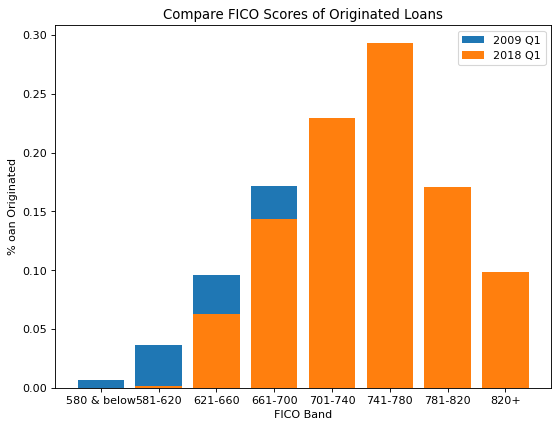

In [28]:
from matplotlib.pyplot import figure

figure(figsize = (8, 6), dpi = 80)

plt.bar(summary_two['fico_band'], summary_two['loan count pct 2008Q1'], label = '2009 Q1')
plt.bar(summary_two['fico_band'], summary_two['loan count pct 2018Q1'], label = '2018 Q1')

plt.xlabel('FICO Band')
plt.ylabel('% oan Originated')
plt.title('Compare FICO Scores of Originated Loans')
plt.legend()
plt.show()

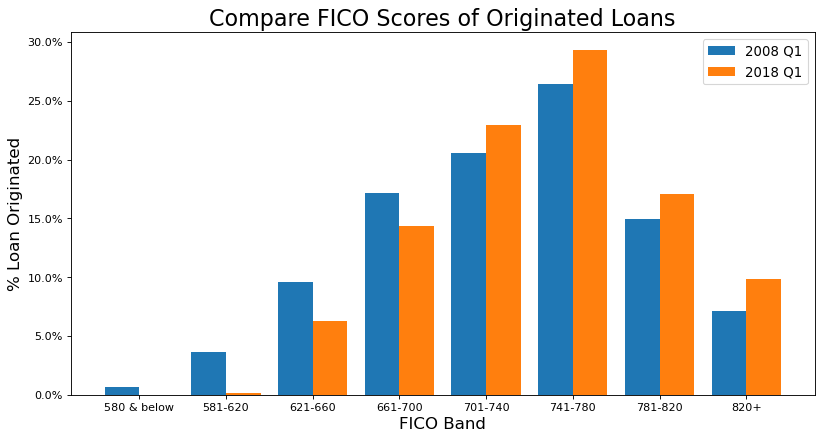

In [31]:
# improve the graph
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick

figure(figsize = (12, 6), dpi = 80)

all_bands=['580 & below', '581-620', '621-660', '661-700', '701-740', '741-780', '781-820', '820+']
x_axis = np.arange(len(all_bands))

plt.bar(x_axis - 0.2, summary_two['loan count pct 2008Q1'], width = 0.4, label = '2008 Q1')
plt.bar(x_axis + 0.2, summary_two['loan count pct 2018Q1'], width = 0.4, label = '2018 Q1')

plt.xlabel('FICO Band', fontsize = 15)
plt.ylabel('% Loan Originated', fontsize = 15)
plt.title('Compare FICO Scores of Originated Loans', fontsize = 20)
plt.xticks(x_axis, (all_bands))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1.0))
plt.legend(loc = 'best', fontsize = 12)
plt.show()

In [ ]:
# Analysis 2: Loan Purpose
'''
    Normally, there are 3 types of purposes for a mortgage loan:
        - Purchase
        - Refinance - You already live in a home.  When the interest rate drops, you refinance your mortgage.  For example, your current mortage is with Bank of America at the rate of 5%.  When the interest rate drops to 3%, you have CitiBank to refinance your loan at 3%. CitiBank will pay off all your mortgage debt to Bank of America.  Now you owe your mortgage to CitiBank but at a lower rate.  As a result, your monthly mortgage payment decreases due to the lower interset rate.
        - Cash-out refinance - You have a home and owe your mortgage to Bank of America, but you need cash to finance a remodeling or for a vacation.  You can borrow money from Bank of America and add the additional debt to your current mortgage.  For example, you currently owe Ban of America 650k in mortgage, you can borrow another 50k in order to travel abroad.  Your mortgage amount will increase to 650k.  Your monthly payment will increase due to an increase in mortgage debt. (You can do cash-out refinance with a different bank.)
    
    A lot of people do 2) and 3) together.  If so, it wll be considered as Cash-out Refinance.
    Before financial meltdown in Q3 2008, many people do cash-out refinance because they expect home value to increase and they will never get in trouble.
'''

In [32]:
# summarize loan purpose

purpose_2008q1 = nodup_2008q1.groupby('PURPOSE')['LOAN_ID'].count().reset_index().rename(columns = {'LOAN_ID': 'loan count 2008 Q1'})
purpose_2018q1 = nodup_2018q1.groupby('PURPOSE')['LOAN_ID'].count().reset_index().rename(columns = {'LOAN_ID': 'loan count 2018 Q1'})

purpose_2008q1['loan count pct 2008 Q1'] = purpose_2008q1['loan count 2008 Q1'] / len(nodup_2008q1['LOAN_ID'])
purpose_2018q1['loan count pct 2018 Q1'] = purpose_2018q1['loan count 2018 Q1'] / len(nodup_2018q1['LOAN_ID'])

In [33]:
print(purpose_2008q1.head())

  PURPOSE  loan count 2008 Q1  loan count pct 2008 Q1
0       C               18214                0.393077
1       P               12261                0.264605
2       R               15861                0.342297
3       U                   1                0.000022


In [34]:
print(purpose_2018q1.head())

  PURPOSE  loan count 2018 Q1  loan count pct 2018 Q1
0       C               12313                0.240432
1       P               28392                0.554401
2       R               10507                0.205167


In [35]:
# merge two summaries

purpose_twofiles = pd.merge(purpose_2008q1, purpose_2018q1, on = 'PURPOSE', how = 'outer')
purpose_twofiles.fillna(0, inplace = True)
purpose_twofiles.head()

,PURPOSE,loan count 2008 Q1,loan count pct 2008 Q1,loan count 2018 Q1,loan count pct 2018 Q1
0,C,18214,0.393077,12313.0,0.240432
1,P,12261,0.264605,28392.0,0.554401
2,R,15861,0.342297,10507.0,0.205167
3,U,1,0.000022,0.0,0.000000


In [36]:
# Since only one loan is classified as U (unknown), delete it will not impact our analysis
purpose_twofiles = purpose_twofiles[purpose_twofiles['PURPOSE'].str.strip().isin(['C', 'P', 'R'])]
purpose_twofiles.head()

,PURPOSE,loan count 2008 Q1,loan count pct 2008 Q1,loan count 2018 Q1,loan count pct 2018 Q1
0,C,18214,0.393077,12313.0,0.240432
1,P,12261,0.264605,28392.0,0.554401
2,R,15861,0.342297,10507.0,0.205167


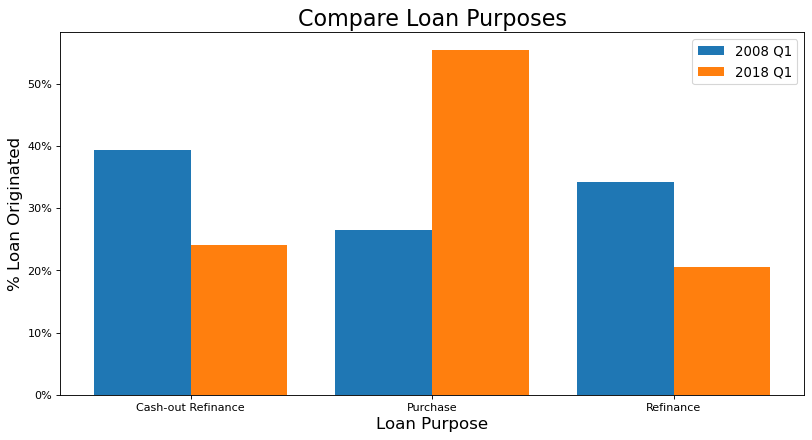

In [37]:
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick  # for formating y axis

figure(figsize=(12, 6), dpi=80)

all_bands=['C', 'P', 'R']
x_axis=np.arange(len(all_bands))

plt.bar(x_axis-0.2, purpose_twofiles['loan count pct 2008 Q1'], width=0.4, label='2008 Q1')
plt.bar(x_axis+0.2, purpose_twofiles['loan count pct 2018 Q1'], width=0.4, label='2018 Q1')

plt.xlabel("Loan Purpose", fontsize=15)
plt.ylabel("% Loan Originated", fontsize=15)
plt.title("Compare Loan Purposes", fontsize=20)
plt.xticks(x_axis, ('Cash-out Refinance', 'Purchase', 'Refinance'))     # relabel loan purpose on the y axis
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))     # format y axis in %
plt.legend(loc='best', fontsize=12)
plt.show()

In [41]:
# Analysis 3: Interest-only mortgage
'''
    In Q1 2008, 20% of loans originated only required borrowers to pay interest. The unpaid balance will accrue to principal balance.
        * Why was there such a policy there? Weren't people afraid that their mortgage debt becomes more and more?
        * Well, back then people expected the house price would go up quickly. They expected to sell their house some years later to earn a big profit.
        * For example, they purchased a house at 600k and made only interest payment each month.  After a year, their principal balance increased to 620K.
        * However, they expected to sell their house after a year at 700k, so they could still make a profit of 80k. 
        * After the financial meltdown, almost no interest-only mortgage loans were allowed to be approved. 
'''

"\n    In Q1 2008, 20% of loans originated only required borrowers to pay interest. The unpaid balance will accrue to principal balance.\n        * Why was there such a policy there? Weren't people afraid that their mortgage debt becomes more and more?\n        * Well, back then people expected the house price would go up quickly. They expected to sell their house some years later to earn a big profit.\n        * For example, they purchased a house at 600k and made only interest payment each month.  After a year, their principal balance increased to 620K.\n        * However, they expected to sell their house after a year at 700k, so they could still make a profit of 80k. \n        * After the financial meltdown, almost no interest-only mortgage loans were allowed to be approved. \n"

In [38]:
nodup_2008q1.groupby('IO')['LOAN_ID'].count()

IO
N    37105
Name: LOAN_ID, dtype: int64

In [40]:
nodup_2008q1['interest_only'] = np.where(nodup_2008q1['IO'].str.strip() == 'N', 0, 1)
nodup_2018q1['interest_only'] = np.where(nodup_2018q1['IO'].str.strip() == 'N', 0, 1)

print("Percentage of interest-only loans in Q1 2008: {}".format(nodup_2008q1['interest_only'].mean()))
print("Percentage of interest-only loans in Q1 2018: {}".format(nodup_2018q1['interest_only'].mean()))

Percentage of interest-only loans in Q1 2008: 0.1992360316809461
Percentage of interest-only loans in Q1 2018: 0.0


<ipython-input-40-def29358f1a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodup_2008q1['interest_only'] = np.where(nodup_2008q1['IO'].str.strip() == 'N', 0, 1)
<ipython-input-40-def29358f1a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodup_2018q1['interest_only'] = np.where(nodup_2018q1['IO'].str.strip() == 'N', 0, 1)


In [42]:
# Analysis 4: Original Loan-to-value ratio (LTV)
'''
    LTV = loan amount / house price
    OLTV = Original LTV. Which means, the LTV back when a loan application was underwritten
    If the house was solded at 500K and the borrower made a down payment of 100k, then LTV=80%.
    A lower LTV usually makes the loan more likely to be approved. 
    After a borrower has made some payments (to both interest and principal), the loan amount will decrease. As a result, LTV will also decrease.

* Before financial meltdown in 2008 when interest-only payment was allowed (as in Analysis 3), some borrowers would see they LTV increase because unpaid principal balance will accrue to loan amount, and hence a higher LTV.
'''

'\n    LTV = loan amount / house price\n    OLTV = Original LTV. Which means, the LTV back when a loan application was underwritten\n    If the house was solded at 500K and the borrower made a down payment of 100k, then LTV=80%.\n    A lower LTV usually makes the loan more likely to be approved. \n    After a borrower has made some payments (to both interest and principal), the loan amount will decrease. As a result, LTV will also decrease.\n\n* Before financial meltdown in 2008 when interest-only payment was allowed (as in Analysis 3), some borrowers would see they LTV increase because unpaid principal balance will accrue to loan amount, and hence a higher LTV.\n'

In [43]:
nodup_2008q1['OLTV'].describe()

count    46337.000000
mean        73.030106
std         15.483105
min          2.000000
25%         66.000000
50%         78.000000
75%         80.000000
max         97.000000
Name: OLTV, dtype: float64

In [44]:
# get the percentile of OLTV
print("OLTV 25th percentile in Q1 2008: {}".format(nodup_2008q1['OLTV'].quantile(0.25)))
print("OLTV 50th percentile in Q1 2008: {}".format(nodup_2008q1['OLTV'].quantile(0.5)))
print("OLTV 75th percentile in Q1 2008: {}".format(nodup_2008q1['OLTV'].quantile(0.75)))
print("OLTV 99.99th percentile in Q1 2008: {}".format(nodup_2008q1['OLTV'].quantile(0.9999)))
print(" ")
print("OLTV 25th percentile in Q1 2018: {}".format(nodup_2018q1['OLTV'].quantile(0.25)))
print("OLTV 50th percentile in Q1 2018: {}".format(nodup_2018q1['OLTV'].quantile(0.5)))
print("OLTV 75th percentile in Q1 2018: {}".format(nodup_2018q1['OLTV'].quantile(0.75)))
print("OLTV 99.99th percentile in Q1 2018: {}".format(nodup_2018q1['OLTV'].quantile(0.9999)))

# We did not use 100the percentile (maximum value) because there could be data errors.  For example, 100 might be mistyped for 10000.

OLTV 25th percentile in Q1 2008: 66.0
OLTV 50th percentile in Q1 2008: 78.0
OLTV 75th percentile in Q1 2008: 80.0
OLTV 99.99th percentile in Q1 2008: 97.0
 
OLTV 25th percentile in Q1 2018: 70.0
OLTV 50th percentile in Q1 2018: 80.0
OLTV 75th percentile in Q1 2018: 90.0
OLTV 99.99th percentile in Q1 2018: 97.0


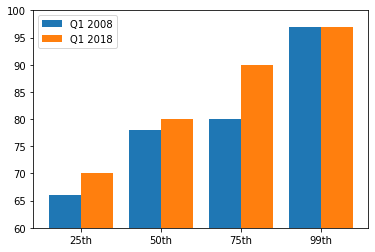

In [45]:
percentile=['25th', '50th', '75th', '99th']
data2008 = [nodup_2008q1['OLTV'].quantile(0.25), nodup_2008q1['OLTV'].quantile(0.5), nodup_2008q1['OLTV'].quantile(0.75), nodup_2008q1['OLTV'].quantile(0.9999)]
data2018=[nodup_2018q1['OLTV'].quantile(0.25), nodup_2018q1['OLTV'].quantile(0.5), nodup_2018q1['OLTV'].quantile(0.75), nodup_2018q1['OLTV'].quantile(0.9999)]

x_axis = np.arange(len(percentile))

plt.bar(x_axis - 0.2, data2008, width = 0.4, label = 'Q1 2008')
plt.bar(x_axis + 0.2, data2018, width = 0.4, label = 'Q1 2018')
plt.xticks(x_axis, percentile)
plt.ylim([60, 100])
plt.legend()
plt.show()

In [46]:
print("LTV in Q1 2009: {}".format(nodup_2008q1['OLTV'].mean()))
print("LTV in Q1 2018: {}".format(nodup_2018q1['OLTV'].mean()))

LTV in Q1 2009: 73.03010553121696
LTV in Q1 2018: 76.94341170038273


In [47]:
# The above chart is a bit counter-intuitive, but there is an explanation
# Why the LTV was lower in 2008 than in 2018? Because house price was inflated, which made LTV look lower

In [48]:
# Analysis 5: Debt to income ratio (DTI)

'''
* DTI=monthly total debt/monthly income
* Debt could include credit card payment, auto loans, student loans, child support, payment for other mortgages, and payment for current mortgage.
* Maximum DTI allowed these days is 0.43. 
* If one's monthly income is 5K, he cannot buy a house with monthly payment of 5K or even 4K or 3K.
* This is because we assume a borrower will have other spending in life such as food, children's expense, various insurance, medical needs, etc.
* However, this restriction was very loose before the financial meltdown in Q3 2008. 
* Hypothesis: DTI before financial meltdown in Q3 2008 was higher than in 2020
'''

"\n* DTI=monthly total debt/monthly income\n* Debt could include credit card payment, auto loans, student loans, child support, payment for other mortgages, and payment for current mortgage.\n* Maximum DTI allowed these days is 0.43. \n* If one's monthly income is 5K, he cannot buy a house with monthly payment of 5K or even 4K or 3K.\n* This is because we assume a borrower will have other spending in life such as food, children's expense, various insurance, medical needs, etc.\n* However, this restriction was very loose before the financial meltdown in Q3 2008. \n* Hypothesis: DTI before financial meltdown in Q3 2008 was higher than in 2020\n"

In [49]:
nodup_2008q1['DTI'].describe()

count    45076.000000
mean        36.690012
std         12.794426
min          1.000000
25%         27.000000
50%         36.000000
75%         46.000000
max         64.000000
Name: DTI, dtype: float64

In [50]:
nodup_2018q1['DTI'].describe()

count    51211.000000
mean        35.109215
std          9.736983
min          1.000000
25%         28.000000
50%         36.000000
75%         43.000000
max         50.000000
Name: DTI, dtype: float64

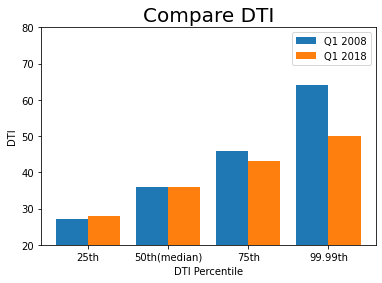

In [51]:
x='DTI'

percentile_bar=['25th', '50th(median)', '75th', '99.99th']
data2008=[nodup_2008q1[x].quantile(0.25), nodup_2008q1[x].quantile(0.5), nodup_2008q1[x].quantile(0.75), nodup_2008q1[x].quantile(0.9999)]
data2018=[nodup_2018q1[x].quantile(0.25), nodup_2018q1[x].quantile(0.5), nodup_2018q1[x].quantile(0.75), nodup_2018q1[x].quantile(0.9999)]

x_axis=np.arange(len(percentile_bar))

plt.bar(x_axis -0.2, data2008, width=0.4, label = 'Q1 2008')
plt.bar(x_axis +0.2, data2018, width=0.4, label = 'Q1 2018')
plt.xticks(x_axis, percentile_bar)
plt.xlabel("DTI Percentile")
plt.ylabel("DTI")
plt.ylim([20, 80])  # we set this range from 20 in order to accentuate the difference between two periods
plt.title("Compare DTI", fontsize=20)
plt.legend(loc='best')
plt.show()

In [52]:
# Analysis 6 - Derogatory Behavior
'''
* Derogatory behavior (usually called 'derog' in the industry) includes: delinquency, charge-off and foreclosure
* Delinquency （违约）: failure to make a payment
    * Delinqneucy=1 or bucket=1: failure to make payment for 1st time
    * Delinquency=2 or bucket=2: failure to make payment for 2 consecutive months
    * ......
    * Delinquency=6: failure to make payments for consecutive 6 months.  It is considered charge-off
    * ......
    * Delinquency=10: failure to make payments for consecutive 10 months.
    * ......
* Charge-off: failure to make payments for consecutive 6 months (or 180 days). A lender usually thinks you are unwilling or unable to pay.
* Foreclosure: when a borrower have failed to make payments for too many months, the bank (borrower) will seize the property.  In this case, we also say the property has been repossessed (repo).

    
* If a borrower is experiencing a financial stress (such as loss of job or a big medical bill), he/she can discuss with the borrower to find a temporary solution.
* Possible solutions: 
    * The lender allows the borrower to pay interest only each month without penalty for a period of time untile the latter gets on his/her feet again. 
    * The lender allows the house to be put on a short sale, i.e., to be sold below its market price. both parties share the loss.
* Borrowers in this situation are considered to be in forbearance, i.e., they are struggling to keep a good records. 
* But forbearance is also a sign of risk. The borrower (the bank) also suffer from a loss. 
     
#### We want to see how fico FICO score, LTV and DTI has impact on derogatory behavior
* Because loans originated in Q1 2008 have a longer performance history than loans originated in Q1 2020, 
* so the former are more likely to encounter bad behavior.
* To make an apple to apple comparison, we will use the two years to compare their performance. 
'''

"\n* Derogatory behavior (usually called 'derog' in the industry) includes: delinquency, charge-off and foreclosure\n* Delinquency （违约）: failure to make a payment\n    * Delinqneucy=1 or bucket=1: failure to make payment for 1st time\n    * Delinquency=2 or bucket=2: failure to make payment for 2 consecutive months\n    * ......\n    * Delinquency=6: failure to make payments for consecutive 6 months.  It is considered charge-off\n    * ......\n    * Delinquency=10: failure to make payments for consecutive 10 months.\n    * ......\n* Charge-off: failure to make payments for consecutive 6 months (or 180 days). A lender usually thinks you are unwilling or unable to pay.\n* Foreclosure: when a borrower have failed to make payments for too many months, the bank (borrower) will seize the property.  In this case, we also say the property has been repossessed (repo).\n\n    \n* If a borrower is experiencing a financial stress (such as loss of job or a big medical bill), he/she can discuss with

In [53]:
# We want to see how FICO score, LTV and DTI impact on derogatory behavior

# Since loans originated in Q1 2008 have a longer performance history than loans originated in Q1 2018, the formoer are more likelyy to encounter bad behaviors.
# To make an apple to apple comparison, we will use the two years to compare their performance
file_2018q1.groupby("FORECLOSURE_DATE")['LOAN_ID'].count()

FORECLOSURE_DATE
12019.0     3
12020.0     3
22020.0     3
32020.0     1
42019.0     3
42021.0     1
42022.0     1
52019.0     4
52021.0     1
52022.0     1
62019.0     1
62020.0     1
62022.0     2
72019.0     2
82019.0     2
82020.0     1
92019.0     1
92020.0     1
102019.0    6
102020.0    1
112018.0    1
112019.0    4
112021.0    2
122019.0    2
Name: LOAN_ID, dtype: int64

In [54]:
file_2018q1['FORECLOSURE_COSTS'].describe()

count       38.000000
mean      4259.765000
std       3191.488171
min         12.130000
25%       1875.230000
50%       3317.170000
75%       6415.457500
max      12655.300000
Name: FORECLOSURE_COSTS, dtype: float64

In [56]:
file_2018q1["OTHER_FORECLOSURE_PROCEEDS"].describe()

count        37.000000
mean      27977.330811
std       58765.351922
min           0.000000
25%           0.000000
50%          45.100000
75%        7100.000000
max      268172.450000
Name: OTHER_FORECLOSURE_PROCEEDS, dtype: float64

In [57]:
file_2018q1["FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT"].describe()

count    25738.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT, dtype: float64

In [58]:
file_2018q1.groupby("FORBEARANCE_INDICATOR")['LOAN_ID'].count()

FORBEARANCE_INDICATOR
7    709799
F     28381
N     13293
R       317
T      2154
Name: LOAN_ID, dtype: int64

In [59]:
# It looks like anything except 7 can be considered as forbearance

In [60]:
# Keep the performance data of first two years only
file_2008q1.columns.tolist()

['POOL_ID',
 'LOAN_ID',
 'ACT_PERIOD',
 'CHANNEL',
 'SELLER',
 'SERVICER',
 'MASTER_SERVICER',
 'ORIG_RATE',
 'CURR_RATE',
 'ORIG_UPB',
 'ISSUANCE_UPB',
 'CURRENT_UPB',
 'ORIG_TERM',
 'ORIG_DATE',
 'FIRST_PAY',
 'LOAN_AGE',
 'REM_MONTHS',
 'ADJ_REM_MONTHS',
 'MATR_DT',
 'OLTV',
 'OCLTV',
 'NUM_BO',
 'DTI',
 'CSCORE_B',
 'CSCORE_C',
 'FIRST_FLAG',
 'PURPOSE',
 'PROP',
 'NO_UNITS',
 'OCC_STAT',
 'STATE',
 'MSA',
 'ZIP',
 'MI_PCT',
 'PRODUCT',
 'PPMT_FLG',
 'IO',
 'FIRST_PAY_IO',
 'MNTHS_TO_AMTZ_IO',
 'DLQ_STATUS',
 'PMT_HISTORY',
 'MOD_FLAG',
 'MI_CANCEL_FLAG',
 'Zero_Bal_Code',
 'ZB_DTE',
 'LAST_UPB',
 'RPRCH_DTE',
 'CURR_SCHD_PRNCPL',
 'TOT_SCHD_PRNCPL',
 'UNSCHD_PRNCPL_CURR',
 'LAST_PAID_INSTALLMENT_DATE',
 'FORECLOSURE_DATE',
 'DISPOSITION_DATE',
 'FORECLOSURE_COSTS',
 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS',
 'ASSET_RECOVERY_COSTS',
 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS',
 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY',
 'NET_SALES_PROCEEDS',
 'CREDIT_ENHANCEMENT_PROCEEDS',
 'REPUR

In [61]:
file_2008q1.groupby('ACT_PERIOD')['LOAN_ID'].count()

ACT_PERIOD
12008     11035
12009     44556
12010     37095
12011     29380
12012     23475
          ...  
122017     5104
122018     4278
122019     3642
122020     3016
122021     2280
Name: LOAN_ID, Length: 174, dtype: int64

In [63]:
file_2008q1['month'] = round(file_2008q1['ACT_PERIOD'] / 10000)
file_2008q1['year'] = round(file_2008q1['ACT_PERIOD'] - file_2008q1['month'] * 10000)
file_2008q1['year_month'] = file_2008q1['year'] * 100 + file_2008q1['month'].astype(int)

file_2008q1[['ACT_PERIOD', 'year', 'month', 'year_month']].head(12)

,ACT_PERIOD,year,month,year_month
0,12008,2008.0,1.0,200801.0
1,22008,2008.0,2.0,200802.0
2,32008,2008.0,3.0,200803.0
3,42008,2008.0,4.0,200804.0
4,52008,2008.0,5.0,200805.0
5,62008,2008.0,6.0,200806.0
6,72008,2008.0,7.0,200807.0
7,82008,2008.0,8.0,200808.0
8,92008,2008.0,9.0,200809.0
9,102008,2008.0,10.0,200810.0


In [64]:
file_2018q1['month']=round(file_2018q1['ACT_PERIOD']/10000)
file_2018q1['year']=round(file_2018q1['ACT_PERIOD']-file_2018q1['month']*10000)
file_2018q1['year_month']=file_2018q1['year']*100+file_2018q1['month'].astype(int)

file_2018q1[['ACT_PERIOD', 'year', 'month', 'year_month']].head(12)

,ACT_PERIOD,year,month,year_month
0,22018,2018.0,2.0,201802.0
1,32018,2018.0,3.0,201803.0
2,42018,2018.0,4.0,201804.0
3,52018,2018.0,5.0,201805.0
4,62018,2018.0,6.0,201806.0
5,72018,2018.0,7.0,201807.0
6,82018,2018.0,8.0,201808.0
7,92018,2018.0,9.0,201809.0
8,102018,2018.0,10.0,201810.0
9,112018,2018.0,11.0,201811.0


In [65]:
# As for loans originated in 2018, we have a performance history of 3.5 years, so we should apply the same length to loans originated in Q1 2008
file_2008q1_2years = file_2008q1[file_2008q1['year_month'] < 201103]
file_2018q1_2years = file_2018q1[file_2018q1['year_month'] < 202203]

In [69]:
# ?
file_2008q1_2years['bad'] = np.where((file_2008q1_2years['FORBEARANCE_INDICATOR'] != '7') | (pd.to_numeric(file_2008q1_2years['DLQ_STATUS'], errors = 'coerce') > 2), 1, 0)
file_2008q1_bad = file_2008q1_2years.groupby('LOAN_ID')['bad'].sum().reset_index()
file_2008q1_bad['bad'] = np.where(file_2008q1_bad['bad'] > 0, 1, 0)

file_2018q1_2years['bad']=np.where((file_2018q1_2years["FORBEARANCE_INDICATOR"] != '7') | (pd.to_numeric(file_2018q1_2years['DLQ_STATUS'], errors='coerce') > 2), 1, 0)
file_2018q1_bad=file_2018q1_2years.groupby('LOAN_ID')['bad'].sum().reset_index()
file_2018q1_bad['bad']=np.where(file_2018q1_bad['bad'] > 0, 1, 0)

<ipython-input-69-4e08a19f5855>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_2008q1_2years['bad'] = np.where((file_2008q1_2years['FORBEARANCE_INDICATOR'] != '7') | (pd.to_numeric(file_2008q1_2years['DLQ_STATUS'], errors = 'coerce') > 2), 1, 0)
<ipython-input-69-4e08a19f5855>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_2018q1_2years['bad']=np.where((file_2018q1_2years["FORBEARANCE_INDICATOR"] != '7') | (pd.to_numeric(file_2018q1_2years['DLQ_STATUS'], errors='coerce') > 2), 1, 0)


In [71]:
file_2008q1_2years['bad']=np.where(pd.to_numeric(file_2008q1_2years['DLQ_STATUS'], errors='coerce') > 3, 1, 0)
file_2008q1_bad=file_2008q1_2years.groupby('LOAN_ID')['bad'].sum().reset_index()
file_2008q1_bad['bad']=np.where(file_2008q1_bad['bad'] > 0, 1, 0)

file_2018q1_2years['bad']=np.where(pd.to_numeric(file_2018q1_2years['DLQ_STATUS'], errors='coerce') > 3, 1, 0)
file_2018q1_bad=file_2018q1_2years.groupby('LOAN_ID')['bad'].sum().reset_index()
file_2018q1_bad['bad']=np.where(file_2018q1_bad['bad'] > 0, 1, 0)

<ipython-input-71-aaf89f28ad53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_2008q1_2years['bad']=np.where(pd.to_numeric(file_2008q1_2years['DLQ_STATUS'], errors='coerce') > 3, 1, 0)
<ipython-input-71-aaf89f28ad53>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_2018q1_2years['bad']=np.where(pd.to_numeric(file_2018q1_2years['DLQ_STATUS'], errors='coerce') > 3, 1, 0)


In [72]:
print("Bad rate for mortgages originated in Q1 2008:"+str(file_2008q1_bad['bad'].mean()))
print("Bad rate for mortgages originated in Q1 2018:"+str(file_2018q1_bad['bad'].mean()))

Bad rate for mortgages originated in Q1 2008:0.07436821546496321
Bad rate for mortgages originated in Q1 2018:0.043153948293368743


In [73]:
# Analysis 6: FICO and other factors on Risk

file_2018q1['bad'] = np.where(pd.to_numeric(file_2018q1['DLQ_STATUS'], errors = 'coerce') > 6, 1, 0)
bad_2018q1 = file_2018q1.groupby('LOAN_ID')['bad'].sum().reset_index()

In [75]:
bad_2018q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51212 entries, 0 to 51211
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   LOAN_ID  51212 non-null  int64
 1   bad      51212 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 600.3 KB


In [76]:
bad_2018q1['derogatory'] = np.where(bad_2018q1['bad'] > 0, 1, 0)

nodup_2018q1_more = pd.merge(nodup_2018q1, bad_2018q1, on = 'LOAN_ID', how = 'inner')

In [78]:
bad_2018q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51212 entries, 0 to 51211
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LOAN_ID     51212 non-null  int64
 1   bad         51212 non-null  int32
 2   derogatory  51212 non-null  int32
dtypes: int32(2), int64(1)
memory usage: 800.3 KB


In [79]:
nodup_2018q1_more['foci_band'] = nodup_2018q1_more['min_fico'].apply(fico_tier)

In [80]:
nodup_2018q1_more.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51212 entries, 0 to 51211
Columns: 114 entries, POOL_ID to foci_band
dtypes: float64(77), int32(3), int64(9), object(25)
memory usage: 44.3+ MB


In [81]:
nodup_2018q1_more.groupby('fico_band')['derogatory'].mean()

fico_band
581-620    0.107143
621-660    0.079094
661-700    0.056056
701-740    0.032755
741-780    0.017026
781-820    0.010283
820+       0.005931
Name: derogatory, dtype: float64

In [89]:
# Here we need to use the original file with entire performance history
# If a borrower has shown any derogatory behavior, we will consider his/her as 'bad'
# DLQ means delinquency

'''
    Extra attention here
'''
file_2018q1['delinquency'] = np.where(pd.to_numeric(file_2018q1['DLQ_STATUS'], errors = 'coerce') > 2, 1, 0)
file_2018q1['charge-off'] = np.where(pd.to_numeric(file_2018q1['DLQ_STATUS'], errors = 'coerce') > 6, 1, 0)
file_2018q1['MI'] = np.where(pd.to_numeric(file_2018q1['MI_TYPE']) >0, 1, 0)
bad_more_2018q1 = file_2018q1.groupby('LOAN_ID')[['bad', 'delinquency', 'charge-off', 'MI']].sum().reset_index()

bad_more_2018q1['bad'] = np.where(bad_more_2018q1['bad'] > 0, 1, 0)
bad_more_2018q1['delinquency'] = np.where(bad_more_2018q1['delinquency'] > 0, 1, 0)
bad_more_2018q1['charge-off'] = np.where(bad_more_2018q1['charge-off'] > 0, 1, 0)
bad_more_2018q1['MI'] = np.where(bad_more_2018q1['MI'] > 0, 1, 0)

In [90]:
nodup_2018q1_more2 = pd.merge(nodup_2018q1_more, bad_more_2018q1, on = 'LOAN_ID', how = 'inner')
nodup_2018q1_more2['bad'] = np.where(nodup_2018q1_more2['bad'] > 0, 1, 0)
nodup_2018q1_more2.fillna(0, inplace = True)

KeyError: 'bad'

In [92]:
# Analysis 7 - Interest Rate

# Question 1: How does FICO impact interest rate?

from matplotlib.pyplot import figure
import matplotlib.ticker as mtick

figure(figsize = (15, 6), dpi = 80)

all_bands=['581-620', '621-660', '661-700', '701-740', '741-780', '781-820', '820+']  # notice that we no longer have 580 & Below
x_axis = np.arange(len(all_bands))

plt.bar(x_axis - 0.1, summary_derogatory['ORIG_RATE'], width = 0.4, color = 'blue')
plt.xlabel('FICO Band', fontsize = 15)
plt.ylabel('Interest Rate', fontsize = 15)
plt.ylim([3.5, 5])
plt.title('Compare Average Interest Rates by FICO Band', fontsize = 20)
plt.xticks(x_axis-0.1, (all_bands))
plt.legend(loc = 'best', fontsize = 12)
plt.show()

NameError: name 'summary_derogatory' is not defined

<Figure size 1200x480 with 0 Axes>